In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy.stats import sem
import numpy as np
from scipy import stats

# Data Files
mobility = "../Resources/PA_2020.csv"
cases = "../Resources/us-counties.csv"

# Read Data
mobilitydf = pd.read_csv(mobility)
casesdf = pd.read_csv(cases)


casesdf['date'] = pd.to_datetime(casesdf.date)
casesdf.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [16]:
mobilitydf['date'] = pd.to_datetime(mobilitydf.date)
mobilitydf.rename(columns={'census_fips_code':'fips'},inplace=True)
mobilitydf.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-15,11.0,-1.0,59.0,NaN,-2.0,-1.0
1,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-16,15.0,-1.0,62.0,NaN,1.0,0.0
2,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-17,19.0,1.0,NaN,NaN,-17.0,4.0
3,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-18,-1.0,-4.0,NaN,NaN,0.0,0.0
4,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-19,3.0,0.0,22.0,NaN,0.0,0.0


In [17]:
# Data Merger

new_df = pd.merge(mobilitydf,casesdf, how='left')

new_df.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,county,state,cases,deaths
0,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-15,11.0,-1.0,59.0,NaN,-2.0,-1.0,NaN,NaN,NaN,NaN
1,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-16,15.0,-1.0,62.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN
2,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-17,19.0,1.0,NaN,NaN,-17.0,4.0,NaN,NaN,NaN,NaN
3,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-18,-1.0,-4.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-19,3.0,0.0,22.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [18]:
# Data Merger

new_df = pd.merge(mobilitydf,casesdf, how='left',on=['date','fips'])

new_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,county,state,cases,deaths
0,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-15,11.0,-1.0,59.0,NaN,-2.0,-1.0,NaN,NaN,NaN,NaN
1,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-16,15.0,-1.0,62.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN
2,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-17,19.0,1.0,NaN,NaN,-17.0,4.0,NaN,NaN,NaN,NaN
3,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-18,-1.0,-4.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,US,United States,Pennsylvania,Adams County,NaN,NaN,42001,2020-02-19,3.0,0.0,22.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
merged_df=new_df.drop(columns=['metro_area','country_region_code','iso_3166_2_code','county','state','deaths'])
merged_df.fillna(0,inplace=True)
merged_df.rename(columns={'country_region':'Country','sub_region_1':'State','sub_region_2':'County',
                          'retail_and_recreation_percent_change_from_baseline':'Retail & Recreation',
                        'grocery_and_pharmacy_percent_change_from_baseline':'Grocery & Pharmacy',
                        'parks_percent_change_from_baseline':'Parks',
                        'transit_stations_percent_change_from_baseline':'Transit Stations',
                        'workplaces_percent_change_from_baseline':'Workplaces',
                         'residential_percent_change_from_baseline':'Residential','fips':'Fips','date':'Date'},inplace=True)
merged_df.head()

,Country,State,County,Fips,Date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit Stations,Workplaces,Residential,cases
0,United States,Pennsylvania,Adams County,42001,2020-02-15,11.0,-1.0,59.0,0.0,-2.0,-1.0,0.0
1,United States,Pennsylvania,Adams County,42001,2020-02-16,15.0,-1.0,62.0,0.0,1.0,0.0,0.0
2,United States,Pennsylvania,Adams County,42001,2020-02-17,19.0,1.0,0.0,0.0,-17.0,4.0,0.0
3,United States,Pennsylvania,Adams County,42001,2020-02-18,-1.0,-4.0,0.0,0.0,0.0,0.0,0.0
4,United States,Pennsylvania,Adams County,42001,2020-02-19,3.0,0.0,22.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'COVID-19 Cases in PA Counties')

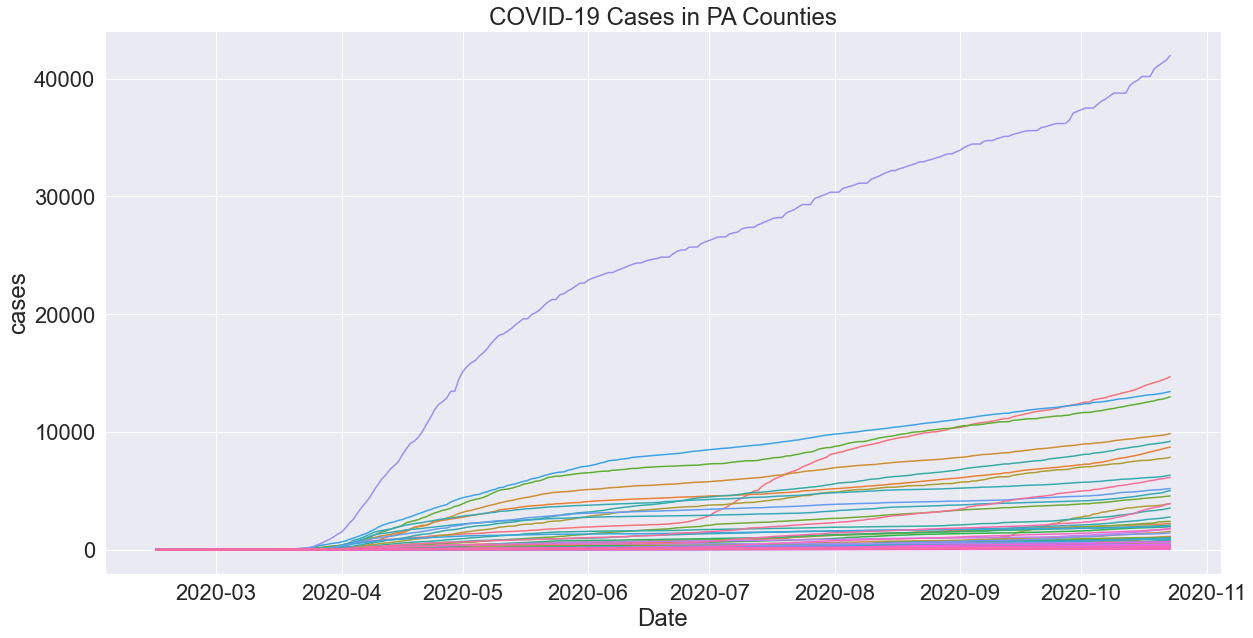

In [163]:
plt.figure(figsize=(20,10))
sns.lineplot(data=merged_df, x="Date", y="cases", hue="County", legend=False)
plt.title("COVID-19 Cases in PA Counties")

In [52]:
five = merged_df.groupby(['County'])['cases'].sum()
five = five.sort_values(ascending=False)
five

County
Philadelphia County    5408322.0
Montgomery County      1743668.0
Delaware County        1591610.0
Allegheny County       1257796.0
Bucks County           1235112.0
                         ...    
McKean County             5640.0
Fulton County             4147.0
Warren County             3551.0
Potter County             2443.0
Sullivan County            739.0
Name: cases, Length: 65, dtype: float64

In [126]:
topfive = list(five.nlargest(11).index)
#bottomfive = list(five.nsmallest(5).index)

In [119]:
topfive="|".join(topfive)

'P|h|i|l|a|d|e|l|p|h|i|a| |C|o|u|n|t|y|||M|o|n|t|g|o|m|e|r|y| |C|o|u|n|t|y|||D|e|l|a|w|a|r|e| |C|o|u|n|t|y|||A|l|l|e|g|h|e|n|y| |C|o|u|n|t|y|||B|u|c|k|s| |C|o|u|n|t|y|||L|a|n|c|a|s|t|e|r| |C|o|u|n|t|y|||B|e|r|k|s| |C|o|u|n|t|y|||L|e|h|i|g|h| |C|o|u|n|t|y|||C|h|e|s|t|e|r| |C|o|u|n|t|y|||N|o|r|t|h|a|m|p|t|o|n| |C|o|u|n|t|y|||L|u|z|e|r|n|e| |C|o|u|n|t|y'

In [66]:
#bottomfive="|".join(bottomfive)

In [67]:
highest=merged_df[merged_df['County'].str.contains(topfive, regex=True)]

In [57]:
#lowest=merged_df[merged_df['County'].str.contains(bottomfive, regex=True)]

In [68]:
combined=pd.concat([highest])
combined

,Country,State,County,Fips,Date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit Stations,Workplaces,Residential,cases
252,United States,Pennsylvania,Allegheny County,42003,2020-02-15,2.0,-1.0,19.0,2.0,4.0,0.0,0.0
253,United States,Pennsylvania,Allegheny County,42003,2020-02-16,8.0,1.0,29.0,2.0,4.0,-1.0,0.0
254,United States,Pennsylvania,Allegheny County,42003,2020-02-17,4.0,-3.0,10.0,-14.0,-15.0,4.0,0.0
255,United States,Pennsylvania,Allegheny County,42003,2020-02-18,2.0,-5.0,-1.0,3.0,2.0,0.0,0.0
256,United States,Pennsylvania,Allegheny County,42003,2020-02-19,2.0,-1.0,10.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12162,United States,Pennsylvania,Philadelphia County,42101,2020-10-19,-24.0,-14.0,-23.0,-41.0,-42.0,11.0,40803.0
12163,United States,Pennsylvania,Philadelphia County,42101,2020-10-20,-23.0,-13.0,-21.0,-44.0,-41.0,12.0,41094.0
12164,United States,Pennsylvania,Philadelphia County,42101,2020-10-21,-22.0,-11.0,-2.0,-41.0,-40.0,11.0,41323.0
12165,United States,Pennsylvania,Philadelphia County,42101,2020-10-22,-23.0,-10.0,3.0,-40.0,-39.0,11.0,41561.0


Text(0.5, 1.0, 'COVID-19 Cases in Top 10 Affected Counties (Without Philadelphia)')

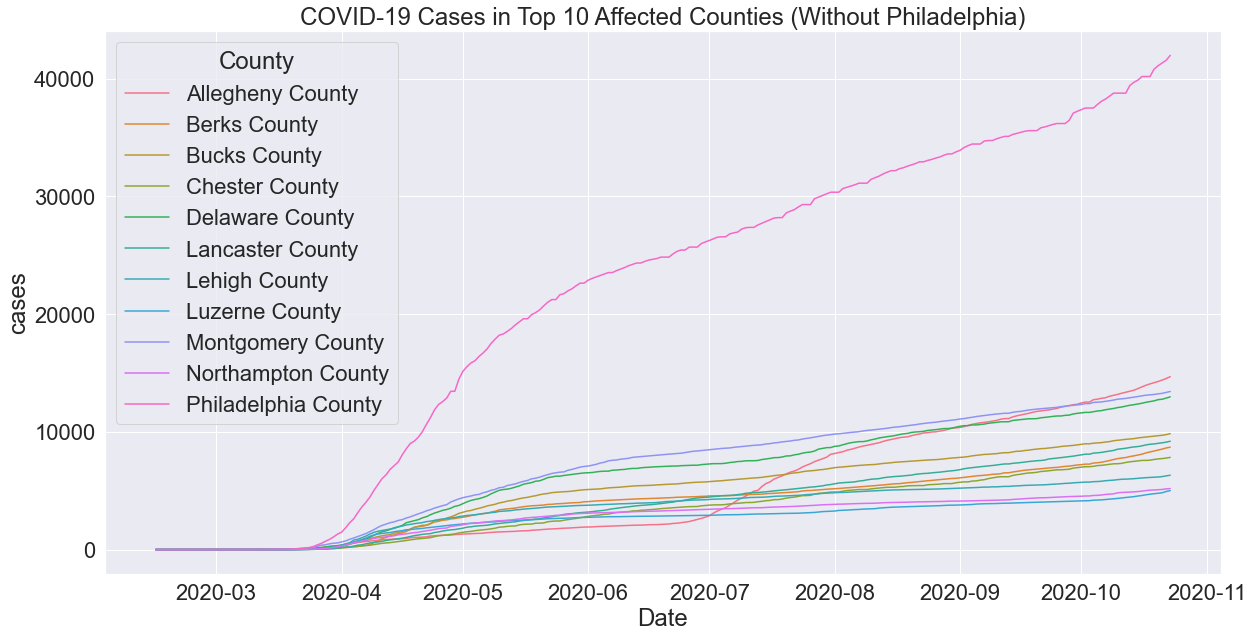

In [164]:
plt.figure(figsize=(20,10))
sns.lineplot(data=combined, x="Date", y="cases", hue="County")
plt.title("COVID-19 Cases in Top 11 Affected Counties")

In [70]:
combined_df = combined.loc[combined['County'] != 'Philadelphia County']
combined_df

,Country,State,County,Fips,Date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit Stations,Workplaces,Residential,cases
252,United States,Pennsylvania,Allegheny County,42003,2020-02-15,2.0,-1.0,19.0,2.0,4.0,0.0,0.0
253,United States,Pennsylvania,Allegheny County,42003,2020-02-16,8.0,1.0,29.0,2.0,4.0,-1.0,0.0
254,United States,Pennsylvania,Allegheny County,42003,2020-02-17,4.0,-3.0,10.0,-14.0,-15.0,4.0,0.0
255,United States,Pennsylvania,Allegheny County,42003,2020-02-18,2.0,-5.0,-1.0,3.0,2.0,0.0,0.0
256,United States,Pennsylvania,Allegheny County,42003,2020-02-19,2.0,-1.0,10.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11412,United States,Pennsylvania,Northampton County,42095,2020-10-19,-10.0,-6.0,72.0,12.0,-32.0,9.0,5062.0
11413,United States,Pennsylvania,Northampton County,42095,2020-10-20,-10.0,-5.0,113.0,15.0,-29.0,8.0,5088.0
11414,United States,Pennsylvania,Northampton County,42095,2020-10-21,-10.0,-5.0,75.0,29.0,-28.0,9.0,5108.0
11415,United States,Pennsylvania,Northampton County,42095,2020-10-22,-10.0,-7.0,108.0,32.0,-26.0,8.0,5155.0


Text(0.5, 1.0, 'COVID-19 Cases in Top 10 Affected Counties (Without Philadelphia)')

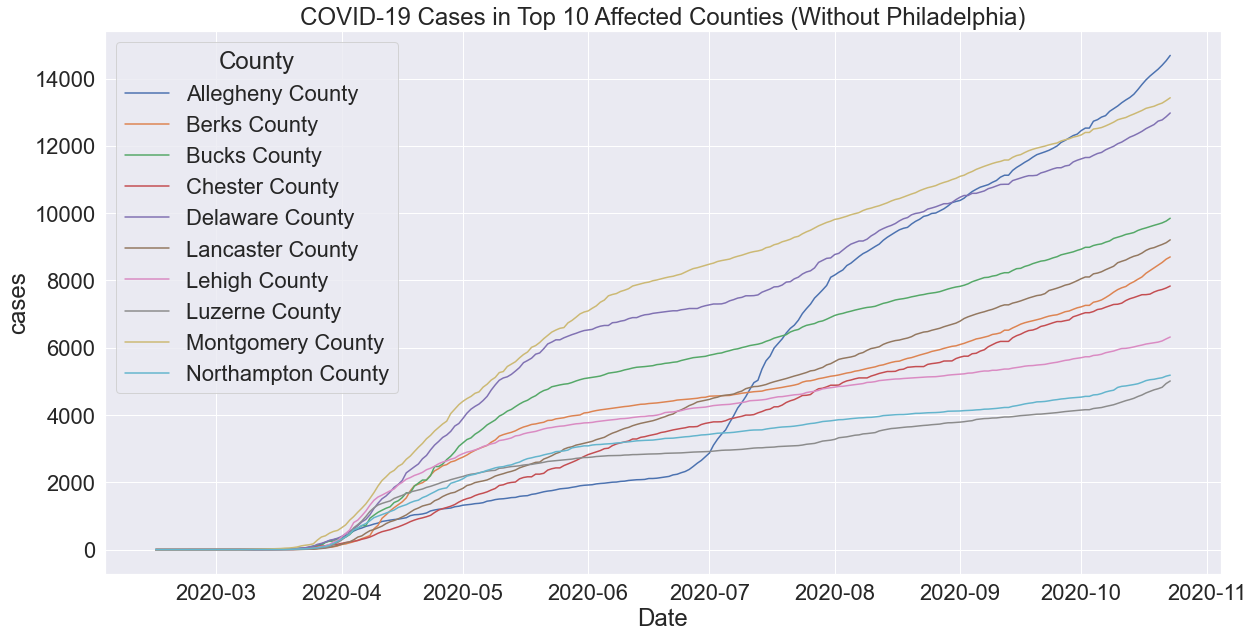

In [165]:
plt.figure(figsize=(20,10))
sns.lineplot(data=combined_df, x="Date", y="cases", hue="County")
plt.title("COVID-19 Cases in Top 10 Affected Counties (Without Philadelphia)")

Text(0.5, 1.0, 'Changes in Retail & Recreation Mobility % in Top 10 Affected Counties (Without Philadelphia)')

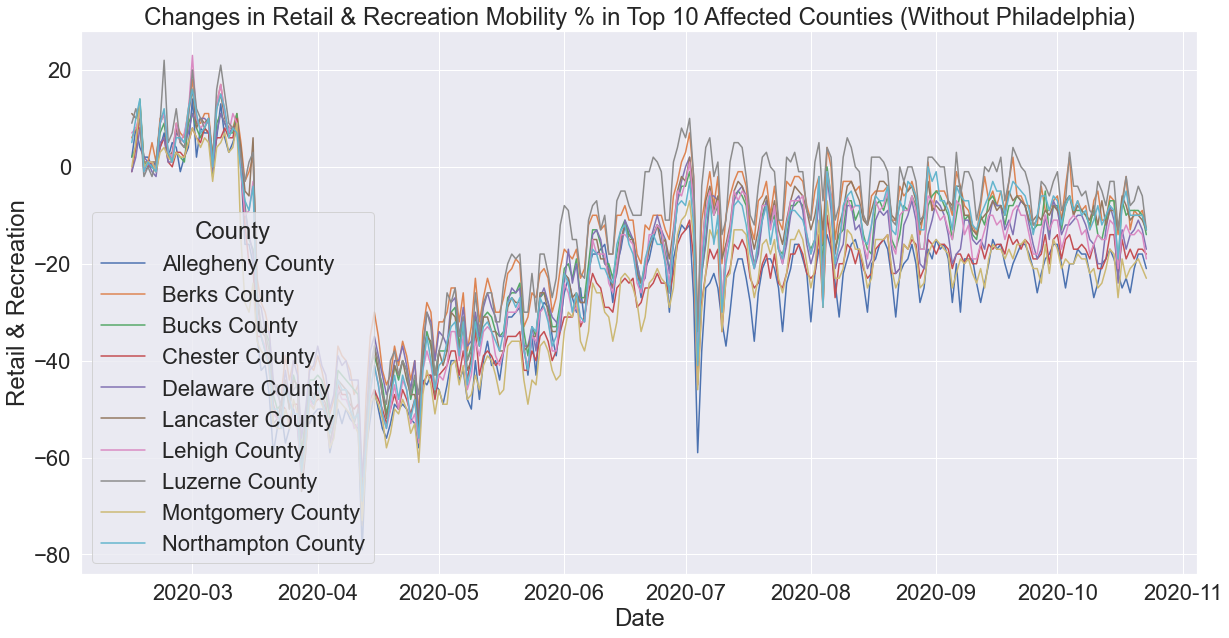

In [168]:
plt.figure(figsize=(20,10))
sns.lineplot(data=combined_df, x="Date", y="Retail & Recreation", hue="County")
plt.title("Changes in Retail & Recreation Mobility % in Top 10 Affected Counties (Without Philadelphia)")

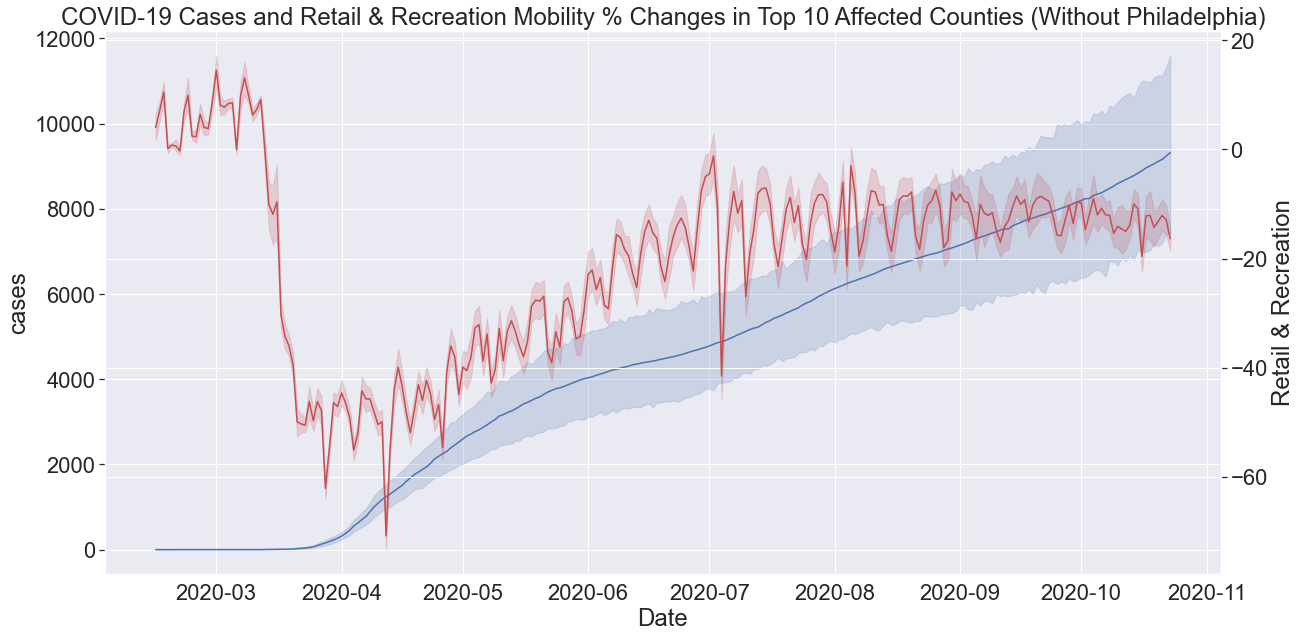

In [169]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='Date', y='cases', data=combined_df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Retail & Recreation', data=combined_df, ax=ax2, color='r')
plt.title("COVID-19 Cases and Retail & Recreation Mobility % Changes in Top 10 Affected Counties (Without Philadelphia)")
plt.show()

In [88]:
philadelphia_df = combined.loc[combined['County'] == 'Philadelphia County']
philadelphia_df

,Country,State,County,Fips,Date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit Stations,Workplaces,Residential,cases
11915,United States,Pennsylvania,Philadelphia County,42101,2020-02-15,6.0,0.0,26.0,1.0,3.0,1.0,0.0
11916,United States,Pennsylvania,Philadelphia County,42101,2020-02-16,5.0,2.0,38.0,0.0,0.0,0.0,0.0
11917,United States,Pennsylvania,Philadelphia County,42101,2020-02-17,2.0,-3.0,35.0,-16.0,-25.0,6.0,0.0
11918,United States,Pennsylvania,Philadelphia County,42101,2020-02-18,4.0,0.0,40.0,4.0,2.0,0.0,0.0
11919,United States,Pennsylvania,Philadelphia County,42101,2020-02-19,0.0,-1.0,47.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12162,United States,Pennsylvania,Philadelphia County,42101,2020-10-19,-24.0,-14.0,-23.0,-41.0,-42.0,11.0,40803.0
12163,United States,Pennsylvania,Philadelphia County,42101,2020-10-20,-23.0,-13.0,-21.0,-44.0,-41.0,12.0,41094.0
12164,United States,Pennsylvania,Philadelphia County,42101,2020-10-21,-22.0,-11.0,-2.0,-41.0,-40.0,11.0,41323.0
12165,United States,Pennsylvania,Philadelphia County,42101,2020-10-22,-23.0,-10.0,3.0,-40.0,-39.0,11.0,41561.0


Text(0.5, 1.0, 'Changes in Retail & Recreation Mobility From 2/15/20 to 10/23/20')

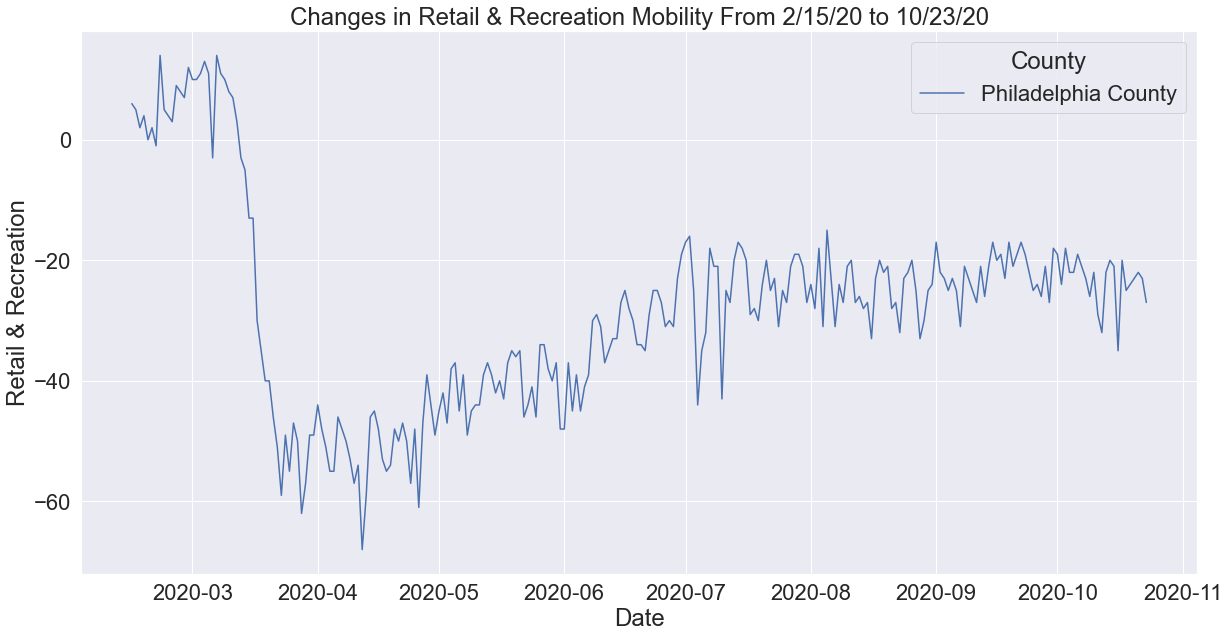

In [151]:
plt.figure(figsize=(20,10))
sns.lineplot(data=philadelphia_df, x="Date", y="Retail & Recreation", hue="County")
plt.title("Changes in Retail & Recreation Mobility From 2/15/20 to 10/23/20")

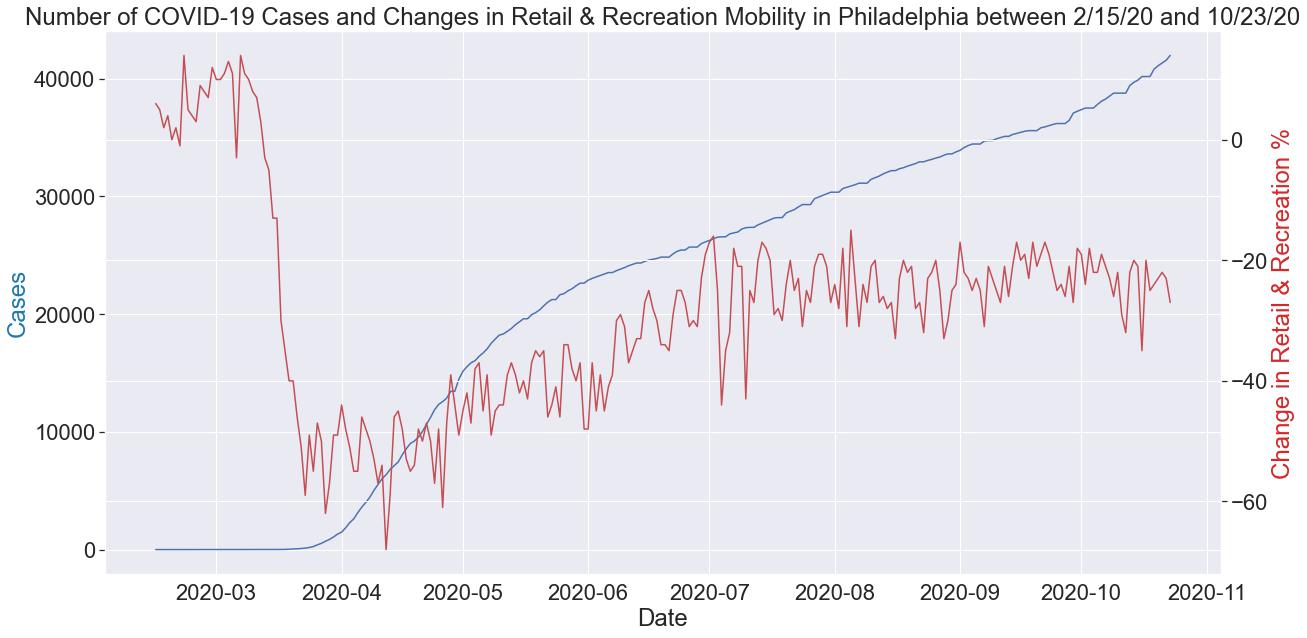

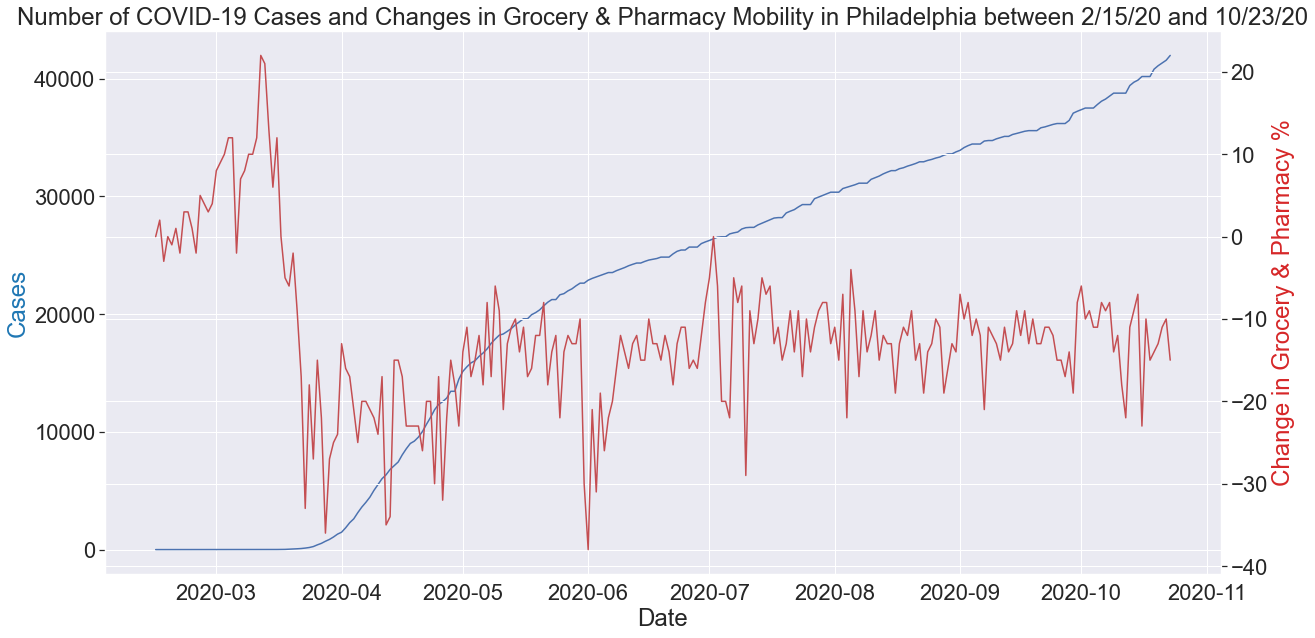

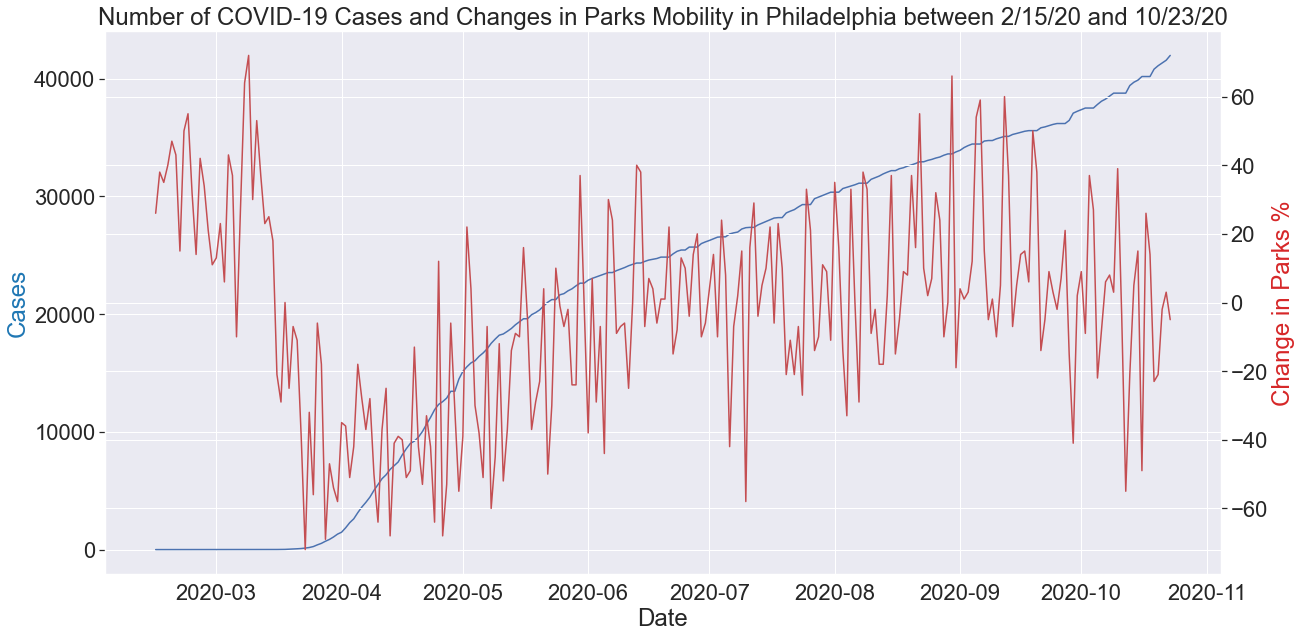

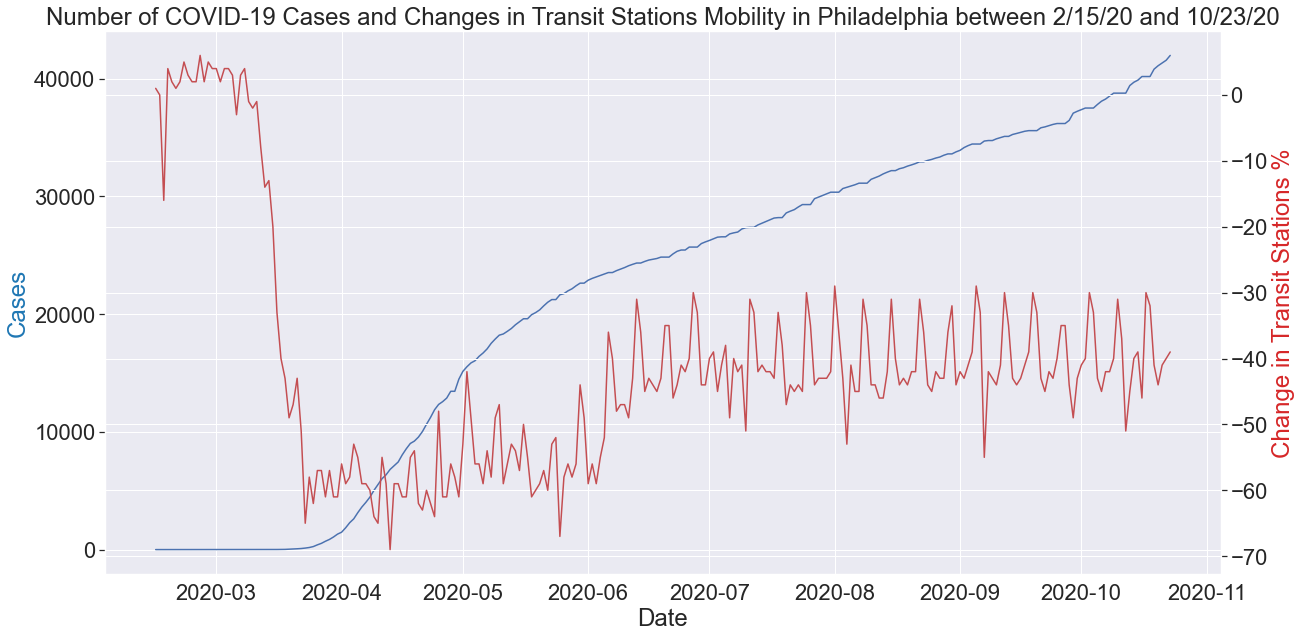

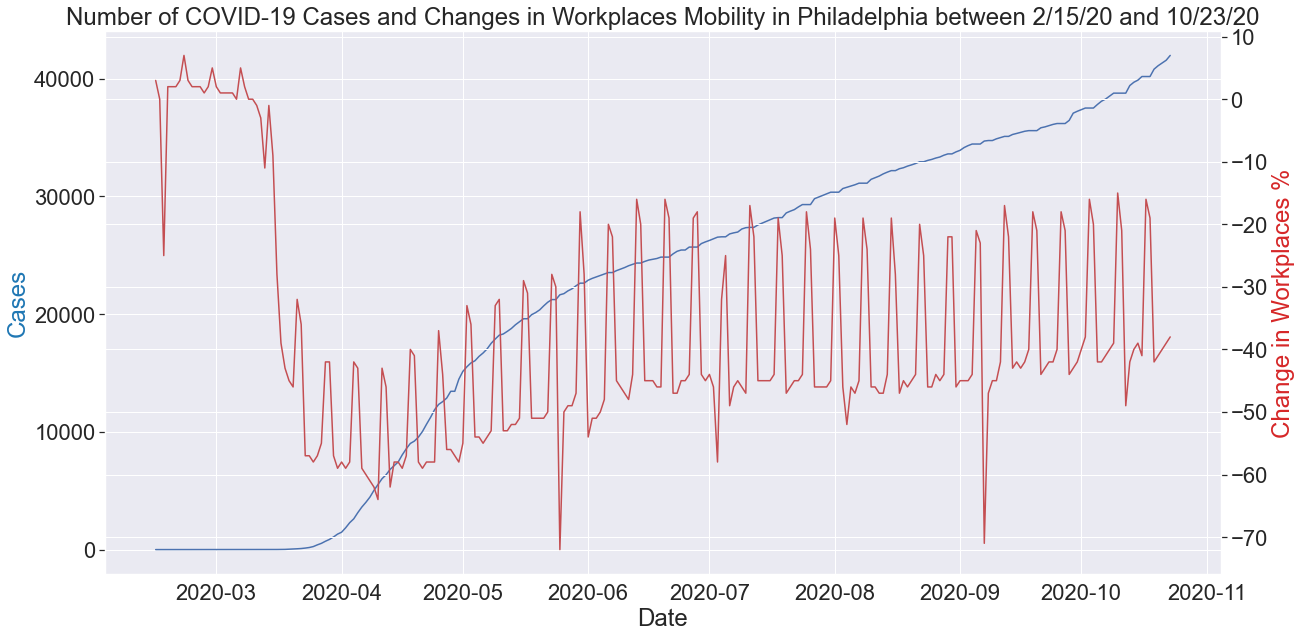

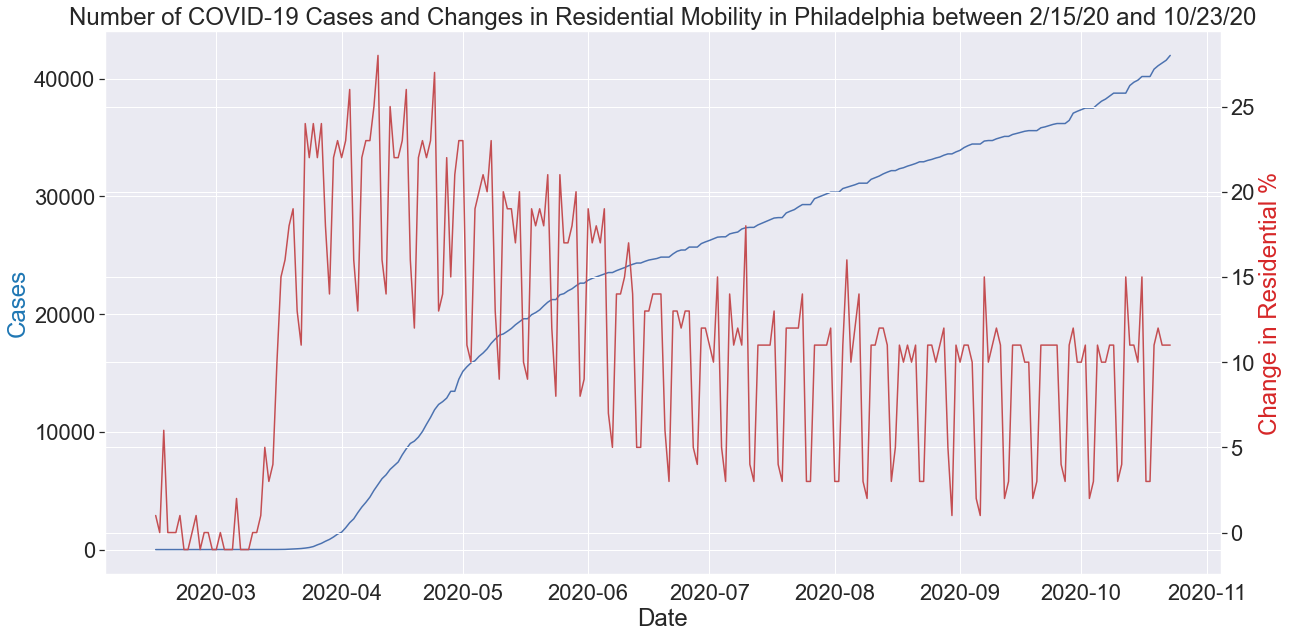

In [155]:
variables = ["Retail & Recreation", "Grocery & Pharmacy", "Parks", "Transit Stations", "Workplaces", "Residential"]

for i in variables: 
    fig, ax = plt.subplots(figsize=(20,10))
    sns.lineplot(x='Date', y='cases', data=philadelphia_df, ax=ax)
    color = 'tab:blue'
    ax.set_ylabel('Cases', color=color)
    ax2 = ax.twinx()
    sns.lineplot(x='Date', y=i, data=philadelphia_df, ax=ax2, color='r')
    color = 'tab:red'
    ax2.set_ylabel(f"Change in {i} %", color=color)
    plt.title(f"Number of COVID-19 Cases and Changes in {i} Mobility in Philadelphia between 2/15/20 and 10/23/20")
    ax.set_xlabel('Date')
    plt.show()

Text(0.5, 1.0, 'Number of COVID-19 Cases v Changes in Retail & Recreation Mobility in Philadelphia')

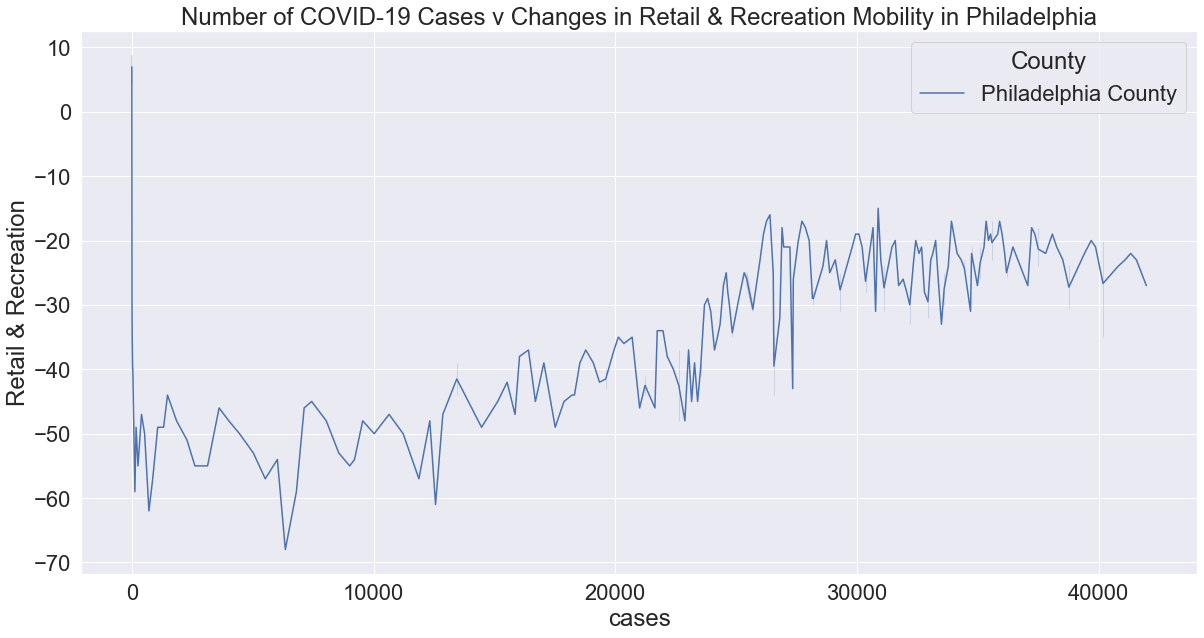

In [148]:
plt.figure(figsize=(20,10))
sns.lineplot(data=philadelphia_df, x="cases", y="Retail & Recreation", hue="County")
plt.title(f"Number of COVID-19 Cases v Changes in Retail & Recreation Mobility in Philadelphia")


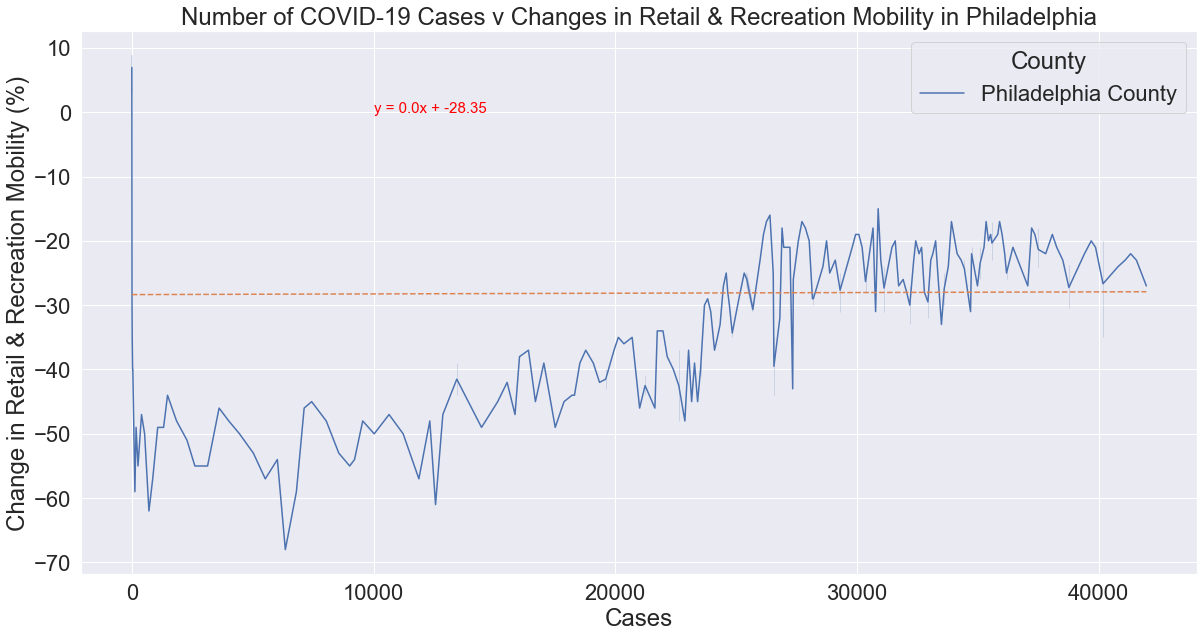

The r-value is: 0.0084895104977928


<Figure size 432x288 with 0 Axes>

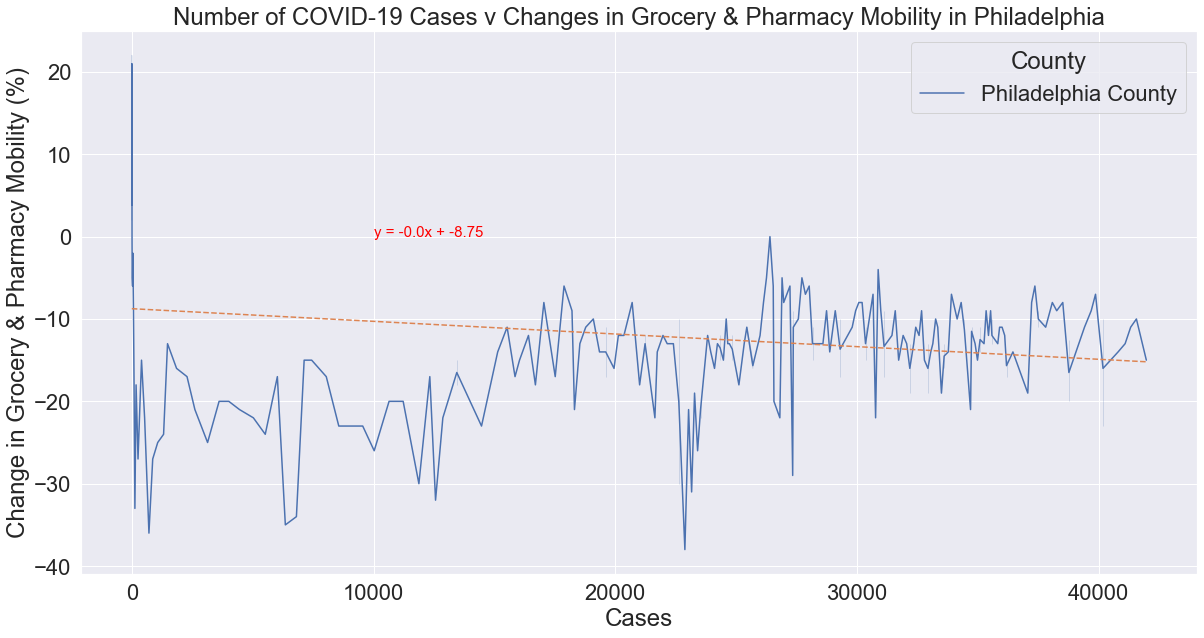

The r-value is: -0.22134858103084898


<Figure size 432x288 with 0 Axes>

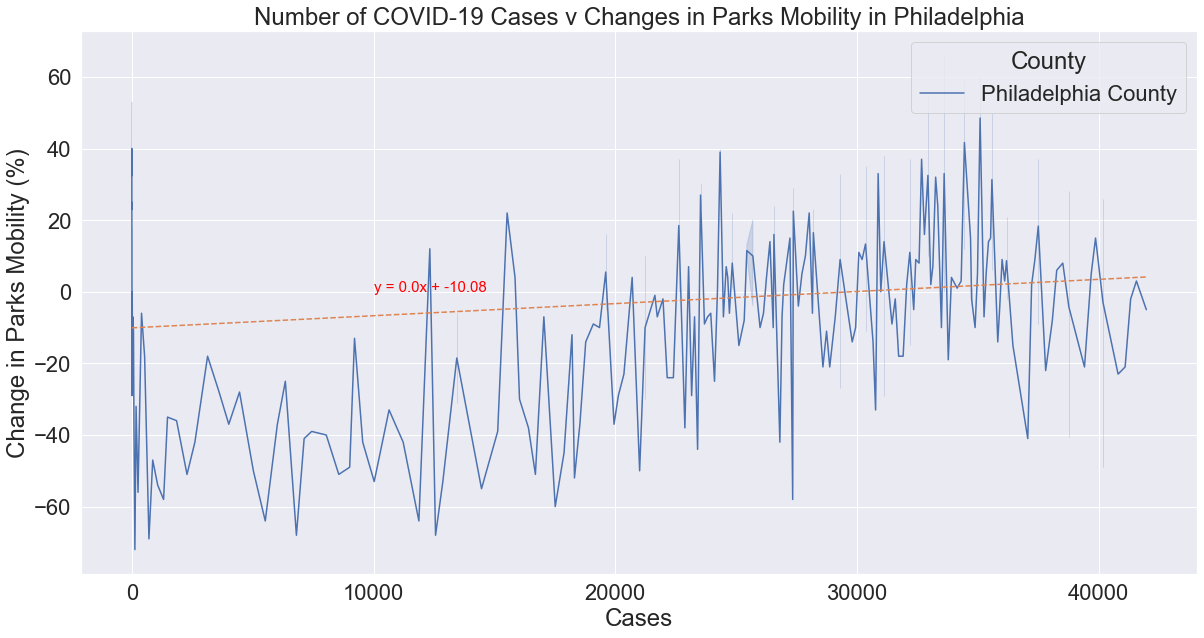

The r-value is: 0.1529158702472844


<Figure size 432x288 with 0 Axes>

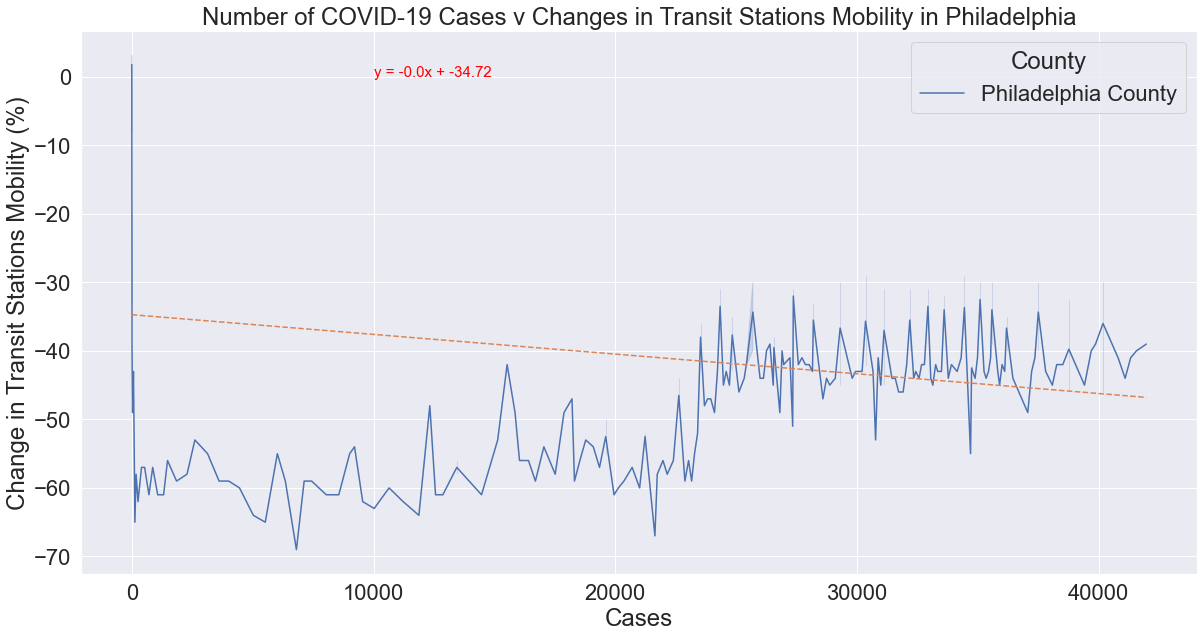

The r-value is: -0.22254604345990237


<Figure size 432x288 with 0 Axes>

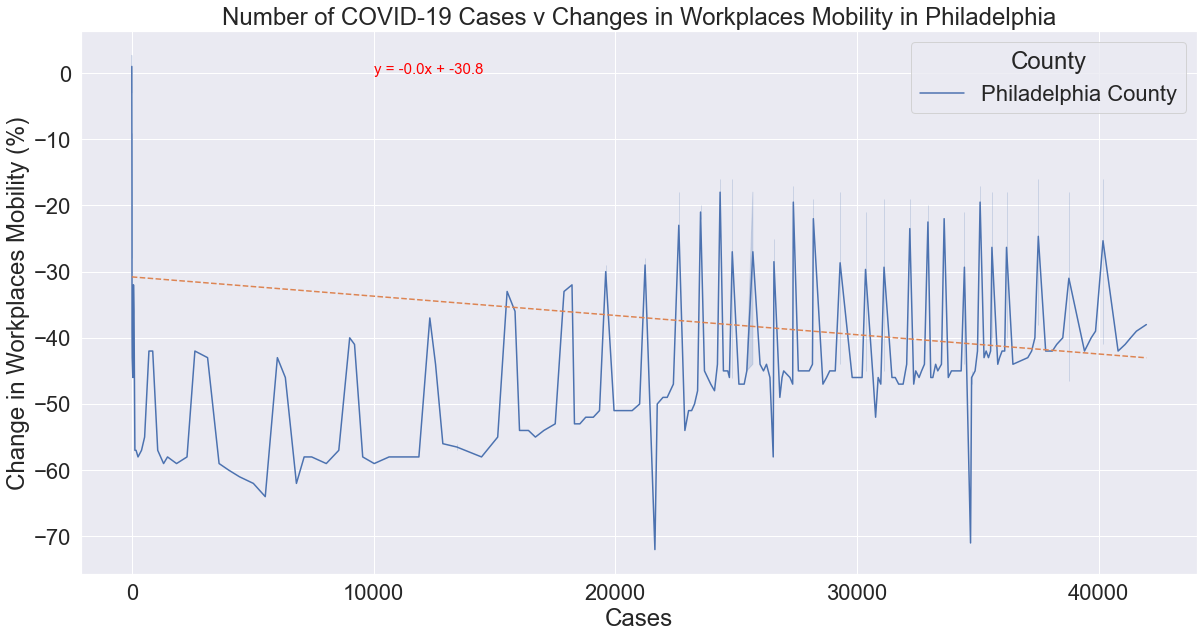

The r-value is: -0.2174337061979637


<Figure size 432x288 with 0 Axes>

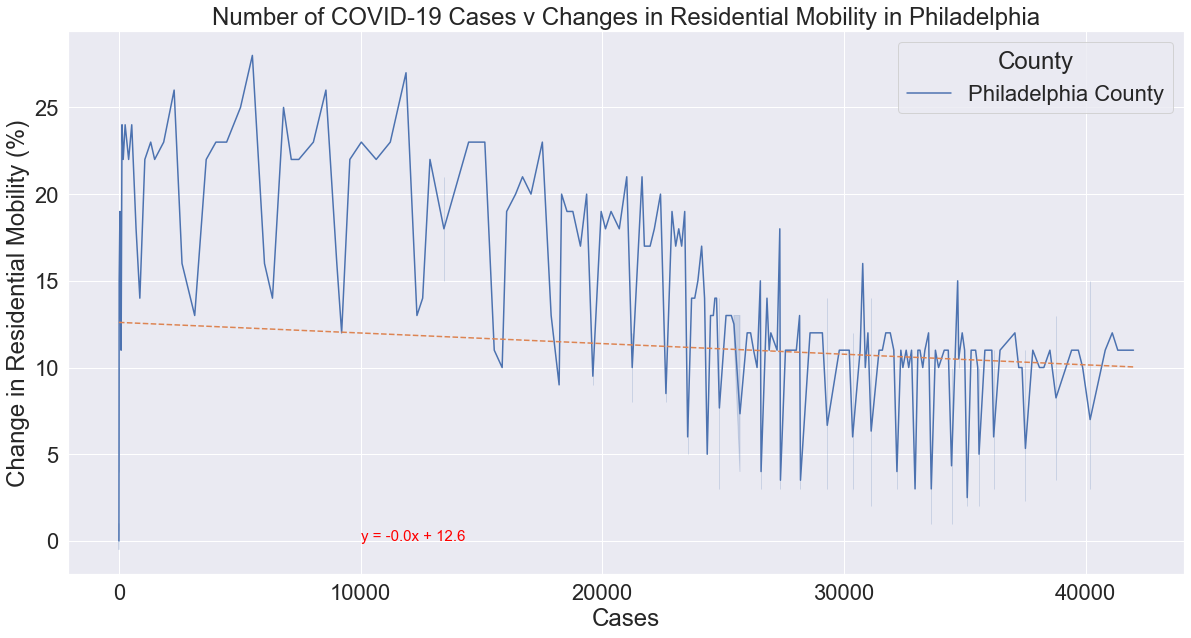

The r-value is: -0.11631862016153786


<Figure size 432x288 with 0 Axes>

In [158]:
variables = ["Retail & Recreation", "Grocery & Pharmacy", "Parks", "Transit Stations", "Workplaces", "Residential"]

for i in variables: 
    p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(philadelphia_df['cases'], philadelphia_df[i])
    p_fit = p_slope * philadelphia_df['cases'] + p_int
    line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))
    
    plt.figure(figsize=(20,10))
    sns.set(font_scale=2)
    sns.lineplot(data=philadelphia_df, x="cases", y=i, hue="County")
    plt.plot(philadelphia_df['cases'], p_fit,"--")
    plt.annotate(line_eq,(10000,0),fontsize=15,color="red")
    plt.xlabel("Cases")
    plt.ylabel(f"Change in {i} Mobility (%)")
    plt.title(f"Number of COVID-19 Cases v Changes in {i} Mobility in Philadelphia")
    plt.show() 

    print(f"The r-value is: {p_r}")
    
    plt.savefig(f"Number of COVID-19 Cases v Changes in {i} Mobility in Philadelphia.png")